In [8]:
import os
import pandas as pd

In [9]:
folder_path = 'C:\\Users\\hp\\Desktop\\CD Individual Final\\Lyrics of 20 Songs'
df = pd.DataFrame(columns=['Title', 'Lyrics'])

In [14]:
# Read files from the folder and separate title and lyrics
for file in os.listdir(folder_path):
    if file.endswith('.txt'):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r', encoding='utf-8') as file:
            lyrics = file.read()
            title, lyrics_text = lyrics.split('\n', 1)
            df = df.append({'Title': title.strip(), 'Lyrics': lyrics_text.strip()}, ignore_index=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_39480\4069362826.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Title': title.strip(), 'Lyrics': lyrics_text.strip()}, ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_39480\4069362826.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Title': title.strip(), 'Lyrics': lyrics_text.strip()}, ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_39480\4069362826.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Title': title.strip(), 'Lyrics': lyrics_text.strip()}, ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_39480\4069362826.py:8: FutureWarning: The frame.append method is deprecated and will be r

In [15]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Define a function for text processing
def process_text(text):
    doc = nlp(text)
    return {
        'Cleaned_Lyrics': ' '.join([token.text for token in doc if not token.is_punct and not token.is_space]).lower(),
        'Tokens': [token.text for token in doc],
        'Lemmas': [token.lemma_ for token in doc],
        'POS': [token.pos_ for token in doc]
    }

# Apply the text processing function to the lyrics
processed_data = df['Lyrics'].apply(process_text)
df = df.join(pd.DataFrame(processed_data.tolist()))

In [16]:
from textblob import TextBlob

# Define a function for sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return {
        'Polarity': analysis.sentiment.polarity,
        'Subjectivity': analysis.sentiment.subjectivity
    }

# Apply the sentiment analysis function to the lyrics
sentiment_data = df['Lyrics'].apply(analyze_sentiment)
df = df.join(pd.DataFrame(sentiment_data.tolist()))

In [17]:
# Preview the DataFrame after sentiment analysis
print(df.head())

           Title                                             Lyrics  \
0           I DO  by\n(G)I-DLE\n2023\n\nHit me like a shot in th...   
1    I Want That  by\n(G)I-DLE\n2023\n\nI want the oh, my, oh, m...   
2  Better Things  by\naespa\n2023\n\nOh, oh, oh\nGot better thin...   
3         Butter  by\nBTS\n2021\n\nSmooth like butter\nLike a cr...   
4       Dynamite  by\nBTS\n2020\n\n'Cause, ah-ah, I'm in the sta...   

                                      Cleaned_Lyrics  \
0  by g)i dle 2023 hit me like a shot in the hear...   
1  by g)i dle 2023 i want the oh my oh my o m g i...   
2  by aespa 2023 oh oh oh got better things to do...   
3  by bts 2021 smooth like butter like a criminal...   
4  by bts 2020 'cause ah ah i 'm in the stars ton...   

                                              Tokens  \
0  [by, \n, (, G)I, -, DLE, \n, 2023, \n\n, Hit, ...   
1  [by, \n, (, G)I, -, DLE, \n, 2023, \n\n, I, wa...   
2  [by, \n, aespa, \n, 2023, \n\n, Oh, ,, oh, ,, ...   
3  [by, \n, 

In [18]:
# Save the final DataFrame to a CSV file
df.to_csv('final_lyrics_dataset_with_sentiment_and_analysis.csv', index=False)

# Preview the final DataFrame
print(df.head())

           Title                                             Lyrics  \
0           I DO  by\n(G)I-DLE\n2023\n\nHit me like a shot in th...   
1    I Want That  by\n(G)I-DLE\n2023\n\nI want the oh, my, oh, m...   
2  Better Things  by\naespa\n2023\n\nOh, oh, oh\nGot better thin...   
3         Butter  by\nBTS\n2021\n\nSmooth like butter\nLike a cr...   
4       Dynamite  by\nBTS\n2020\n\n'Cause, ah-ah, I'm in the sta...   

                                      Cleaned_Lyrics  \
0  by g)i dle 2023 hit me like a shot in the hear...   
1  by g)i dle 2023 i want the oh my oh my o m g i...   
2  by aespa 2023 oh oh oh got better things to do...   
3  by bts 2021 smooth like butter like a criminal...   
4  by bts 2020 'cause ah ah i 'm in the stars ton...   

                                              Tokens  \
0  [by, \n, (, G)I, -, DLE, \n, 2023, \n\n, Hit, ...   
1  [by, \n, (, G)I, -, DLE, \n, 2023, \n\n, I, wa...   
2  [by, \n, aespa, \n, 2023, \n\n, Oh, ,, oh, ,, ...   
3  [by, \n, 

In [19]:
!pip install pandas spacy textblob
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.4/12.8 MB 11.2 MB/s eta 0:00:02
     --- ------------------------------------ 1.1/12.8 MB 14.3 MB/s eta 0:00:01
     ------ --------------------------------- 2.2/12.8 MB 17.7 MB/s eta 0:00:01
     ---------- ----------------------------- 3.4/12.8 MB 21.5 MB/s eta 0:00:01
     -------------- ------------------------- 4.8/12.8 MB 23.5 MB/s eta 0:00:01
     ------------------ --------------------- 6.0/12.8 MB 23.9 MB/s eta 0:00:01
     -------------------- ------------------- 6.6/12.8 MB 22.3 MB/s eta 0:00:01
     ---------------------- ----------------- 7.2/12.8 MB 20.8 MB/s eta 0:00:01
     ------------------------ --------------- 7.8/12.8 MB 19.9 MB/s eta 0:00:01
     ------------------------- -------------- 8.3/12.8 MB 19.0 MB/s eta 0:00:01
     --------------------------- ------------ 8.7/12.8 MB 18.6 MB/s eta 0:00:01
     ---------------------------- ----------- 9.

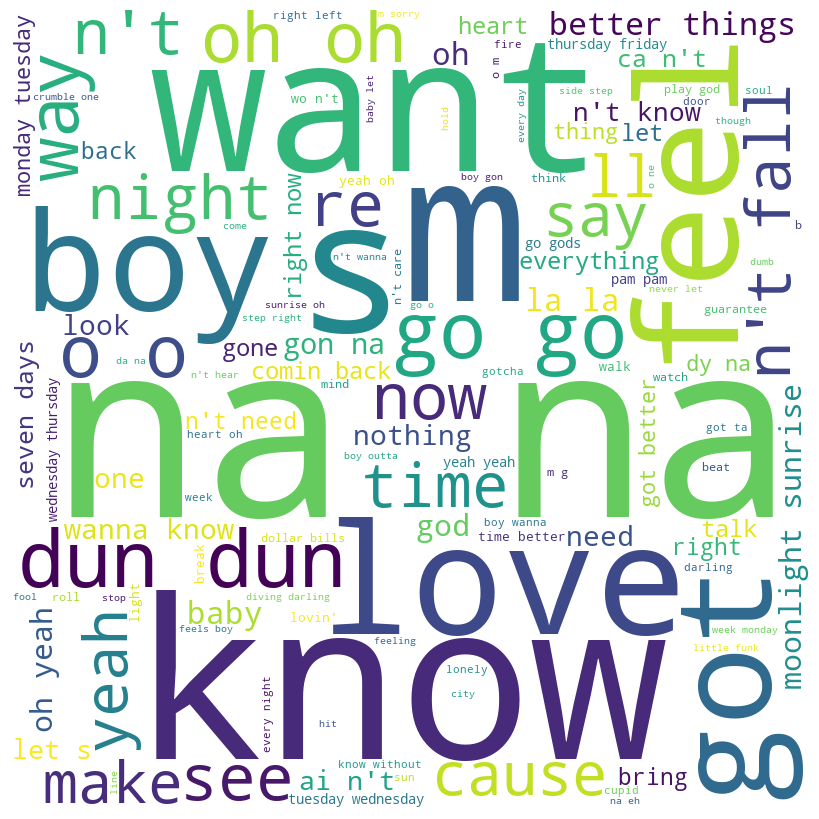

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

all_lyrics = ' '.join(df['Cleaned_Lyrics'])

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = STOPWORDS, 
                      min_font_size = 10).generate(all_lyrics)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

plt.show()

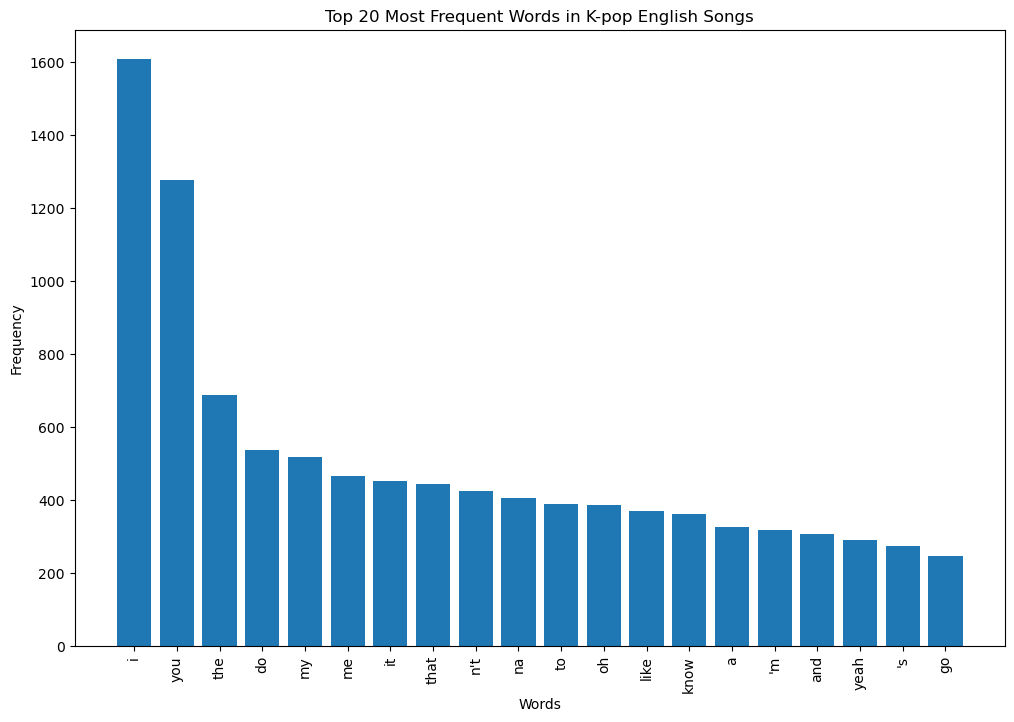

In [21]:
from collections import Counter
import matplotlib.pyplot as plt

# The most common words in statistics
word_freq = Counter(" ".join(df["Cleaned_Lyrics"]).split()).most_common(20)
words, counts = zip(*word_freq)

plt.figure(figsize=(12,8))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.title('Top 20 Most Frequent Words in K-pop English Songs')
plt.show()

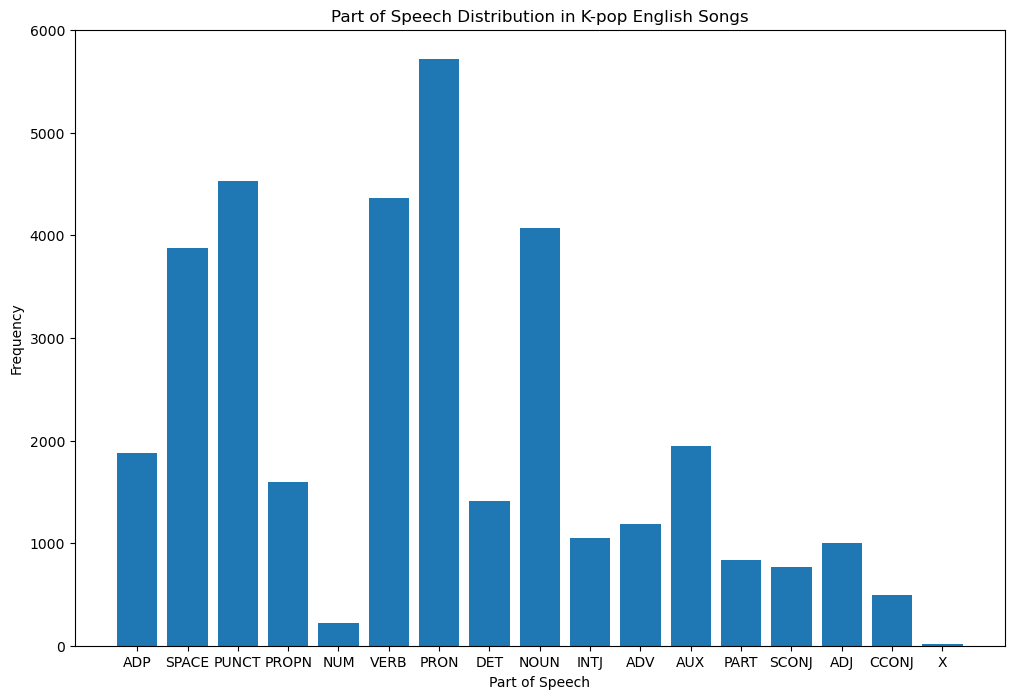

In [22]:
from collections import Counter
import matplotlib.pyplot as plt

pos_list = [pos for sublist in df['POS'] for pos in sublist]
pos_freq = Counter(pos_list)

plt.figure(figsize=(12,8))
plt.bar(pos_freq.keys(), pos_freq.values())
plt.xlabel('Part of Speech')
plt.ylabel('Frequency')
plt.title('Part of Speech Distribution in K-pop English Songs')
plt.show()